1. Importing libraries and data
2. Data cleaning
3. Data preparation
4. Regression analysis

In [ ]:
# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\RUD\Desktop\A6_Boat_Sales'

In [5]:
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'df_boat_map.csv'), index_col = False)

In [ ]:
# 2. Data cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Location',
       'Number of views last 7 days', 'Price in EUR', 'Visibility',
       'Web_traffic'],
      dtype='object')

In [8]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [9]:
df.shape

(6607, 12)

In [ ]:
#3. Data preparation

C:\Users\RUD\AppData\Local\Temp\ipykernel_3844\972222537.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], bins=25) # Shows extreme values
C:\Users\RUD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Length', ylabel='Density'>

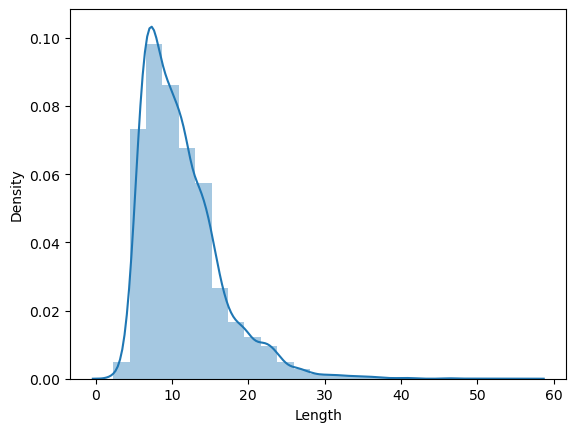

In [11]:
sns.distplot(df['Length'], bins=25) # Distribution Check

In [12]:
df['Length'].mean()

11.228537914333284

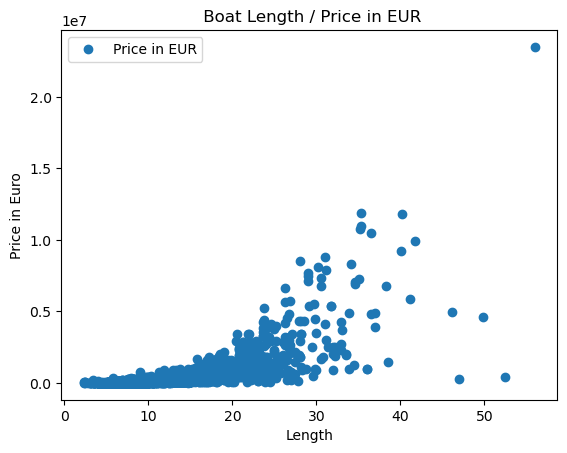

In [14]:
# Create a scatterplot
df.plot(x = 'Length', y='Price in EUR',style='o')
plt.title(' Boat Length / Price in EUR')  
plt.xlabel('Length')  
plt.ylabel('Price in Euro')  
plt.show()

In [17]:
# Reshape the variables in arrays
x = df['Length'].values.reshape(-1,1)
y = df['Price in EUR'].values.reshape(-1,1)

In [18]:
x

array([[4.  ],
       [3.55],
       [4.35],
       ...,
       [6.  ],
       [4.4 ],
       [3.6 ]])

In [19]:
y

array([[3490],
       [3399],
       [3535],
       ...,
       [4999],
       [4499],
       [3817]], dtype=int64)

In [20]:
# Split data into a training set and a test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Hypothesis: The higher the length, the higher the price.

In [22]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set
regression.fit(x_train, y_train)

LinearRegression()

In [24]:
LinearRegression()

LinearRegression()

In [25]:
# Predict the values of y using X.
y_predicted = regression.predict(x_test)

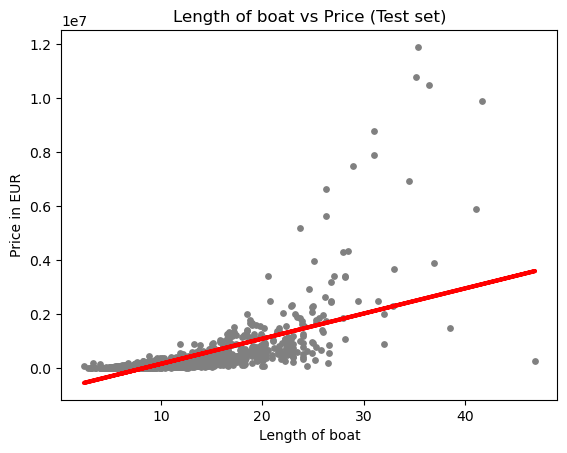

In [26]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length of boat vs Price (Test set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in EUR')
plot_test.show()

In [27]:
# Create objects that contain the model  statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [28]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[93080.05131714]]
Mean squared error:  340572600795.297
R2 score:  0.41576146191855656


Intepretation:
The slope is positive, so the relationship is positive. 
This fits the hypothesis: The higher the boat length, the higher the price. 
R2 is low at 0.41.

In [29]:
y_predicted

array([[ 566051.39648117],
       [ 295188.44714829],
       [-231644.64330673],
       ...,
       [ 367790.88717566],
       [ 324974.06356977],
       [-192551.02175353]])

In [31]:
# Compare the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,299000,5.660514e+05
1,75000,2.951884e+05
2,18900,-2.316446e+05
3,157000,1.313676e+05
4,260000,5.195114e+05
5,590000,1.358163e+06
6,21500,-8.830136e+04
7,430200,4.255005e+05
8,105000,3.026349e+05
9,265000,3.463825e+05


Compare how the regression fits the training set


In [32]:
# Predict.
y_predicted_train = regression.predict(x_train)

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[93080.05131714]]
Mean squared error:  315185996412.9759
R2 score:  0.4183947950894734


Include any reflections you have on the impact of possible data bias.
Positive relationship,  high MSE and a low R2. It looks like length isn't the best factor for the boat price. Old and/or used boats can be long. So maybe other factors are more interesting.

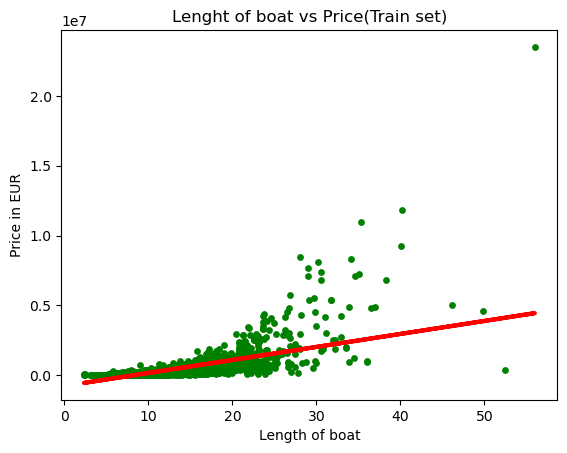

In [36]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Lenght of boat vs Price(Train set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in EUR')
plot_test.show()

Performance improvement after removing outliers


In [38]:
df['Price in EUR'].mean() # Check the mean

277253.84622370213

In [39]:
# Clean the extreme values from "Price"
df_test = df[df['Price in EUR'] <=20000000]

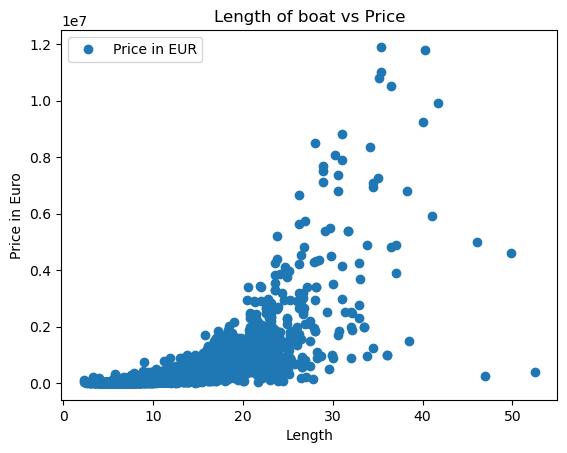

In [42]:
# scatterplot 
df_test.plot(x = 'Length', y='Price in EUR',style='o')
plt.title('Length of boat vs Price')  
plt.xlabel('Length')  
plt.ylabel('Price in Euro')  
plt.show()

In [44]:
# Reshape the variables in arrays
x_2 = df_test['Length'].values.reshape(-1,1)
y_2 = df_test['Price in EUR'].values.reshape(-1,1)

In [45]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.3, random_state=0)

In [46]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(x_train_2, y_train_2)

LinearRegression()

In [47]:
# Predict
y_predicted_2 = regression.predict(x_test_2)

In [48]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[87330.48387677]]
Mean squared error:  338040569134.9493
R2 score:  0.4072269976444476


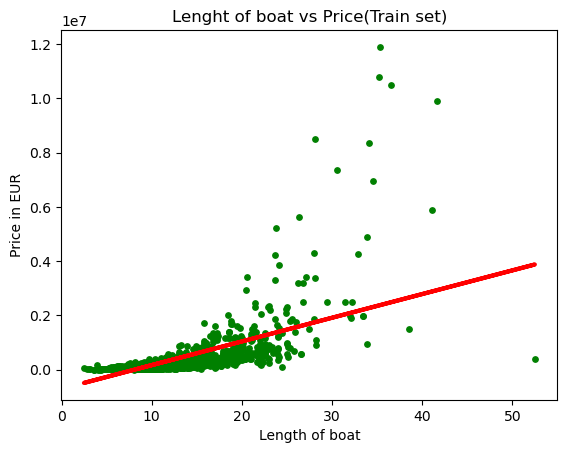

In [50]:
plot_test = plt
plot_test.scatter(x_test_2, y_test_2, color='green', s = 15)
plot_test.plot(x_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Lenght of boat vs Price(Train set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in EUR')
plot_test.show()

In [51]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,299000,5.457708e+05
1,75000,2.916391e+05
2,18900,-2.026515e+05
3,156000,3.405441e+05
4,260000,3.300645e+05
5,590000,1.109052e+06
6,21500,-6.816253e+04
7,430000,1.292446e+06
8,105000,1.615166e+05
9,265000,4.802729e+05
